In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata

In [2]:
df = pd.read_excel("../../crawl_data/data/data_laptop.xlsx")

> Số dòng và số cột

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 176 entries, id to badges_new_4_arr_text_0_value
dtypes: bool(16), float64(35), int64(52), object(73)
memory usage: 126.7+ KB


> Xem dữ liệu

10 dòng đầu

In [4]:
df.head(10)

,id,sku,name,url_key,url_path,type,author_name,book_cover,brand_name,short_description,...,badges_new_6_type,visible_impression_info_amplitude_gift_rule_ids,badges_new_3_icon,badges_new_3_icon_height,badges_new_3_icon_width,badges_new_2_icon,badges_new_2_icon_height,badges_new_2_icon_width,badges_new_3_arr_text_0_value,badges_new_4_arr_text_0_value
0,278226869,2945221924243,Laptop Dell Inspiron 3530 71043887( Core i5-13...,laptop-dell-inspiron-3530-71043887-core-i5-133...,laptop-dell-inspiron-3530-71043887-core-i5-133...,NaN,NaN,NaN,Dell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,278226504,8916945952669,Laptop Dell Inspiron 15 3530 N3530-i3U085W11SL...,laptop-dell-inspiron-15-3530-n3530-i3u085w11sl...,laptop-dell-inspiron-15-3530-n3530-i3u085w11sl...,NaN,NaN,NaN,Dell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,278078317,3260486333768,Asus Vivobook S 14 Flip TP3402VA-LZ632W (Intel...,asus-vivobook-s-14-flip-tp3402va-lz632w-intel-...,asus-vivobook-s-14-flip-tp3402va-lz632w-intel-...,NaN,NaN,NaN,Asus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,278078298,4377873239825,Asus Vivobook 15 X1502VA-BQ886W (Intel Core i7...,asus-vivobook-15-x1502va-bq886w-intel-core-i7-...,asus-vivobook-15-x1502va-bq886w-intel-core-i7-...,NaN,NaN,NaN,Asus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,278078286,8288406691059,Asus Vivobook 14 X1405VA-LY623W (Intel Core i5...,asus-vivobook-14-x1405va-ly623w-intel-core-i5-...,asus-vivobook-14-x1405va-ly623w-intel-core-i5-...,NaN,NaN,NaN,Asus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,278078281,5166127674767,ASUS Vivobook X1404VA-NK394W (Intel Core i3-13...,asus-vivobook-x1404va-nk394w-intel-core-i3-131...,asus-vivobook-x1404va-nk394w-intel-core-i3-131...,NaN,NaN,NaN,Asus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,278078278,9946033681073,Asus Zenbook 14 UX3405CA-PZ204WS (Intel Core U...,asus-zenbook-14-ux3405ca-pz204ws-intel-core-ul...,asus-zenbook-14-ux3405ca-pz204ws-intel-core-ul...,NaN,NaN,NaN,Asus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,278076611,2162922536735,ASUS ROG Strix G16 G614JU-N3480W (Intel Core i...,asus-rog-strix-g16-g614ju-n3480w-intel-core-i5...,asus-rog-strix-g16-g614ju-n3480w-intel-core-i5...,NaN,NaN,NaN,Asus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,278076601,9936685515442,Laptop Asus TUF Gaming A15 FA506NCR-HN097W (R7...,laptop-asus-tuf-gaming-a15-fa506ncr-hn097w-r7-...,laptop-asus-tuf-gaming-a15-fa506ncr-hn097w-r7-...,NaN,NaN,NaN,Asus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,278071899,1759391453815,Laptop Lenovo ThinkPad E14 Gen 7 21SX002QVA (I...,laptop-lenovo-thinkpad-e14-gen-7-21sx002qva-in...,laptop-lenovo-thinkpad-e14-gen-7-21sx002qva-in...,NaN,NaN,NaN,Lenovo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


10 dòng cuối

In [5]:
df.tail(10)

,id,sku,name,url_key,url_path,type,author_name,book_cover,brand_name,short_description,...,badges_new_6_type,visible_impression_info_amplitude_gift_rule_ids,badges_new_3_icon,badges_new_3_icon_height,badges_new_3_icon_width,badges_new_2_icon,badges_new_2_icon_height,badges_new_2_icon_width,badges_new_3_arr_text_0_value,badges_new_4_arr_text_0_value
90,275516477,7610043793015,Laptop HP 14 - ep0112TU 8C5L1PA (Intel Core i5...,laptop-hp-14-ep0112tu-8c5l1pa-intel-core-i5-13...,laptop-hp-14-ep0112tu-8c5l1pa-intel-core-i5-13...,NaN,NaN,NaN,HP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 Cấu hình,NaN
91,275381290,3299999286172,MÁY TÍNH XÁCH TAY (NB) ACER Aspire 7 A715-76-5...,may-tinh-xach-tay-nb-acer-aspire-7-a715-76-53p...,may-tinh-xach-tay-nb-acer-aspire-7-a715-76-53p...,NaN,NaN,NaN,Acer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,274775419,8053579735999,Lenovo ThinkPad E16 Gen 3 (21SR002JVA) | Intel...,lenovo-thinkpad-e16-gen-1-21jn006gvn-intel-cor...,lenovo-thinkpad-e16-gen-1-21jn006gvn-intel-cor...,NaN,NaN,NaN,Lenovo,NaN,...,NaN,NaN,NaN,NaN,NaN,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,NaN,NaN
93,273634022,8955424266968,Laptop HP Pavilion 15-eg2083TU 7C0W9PA (Core i...,laptop-hp-pavilion-15-eg2083tu-7c0w9pa-core-i5...,laptop-hp-pavilion-15-eg2083tu-7c0w9pa-core-i5...,NaN,NaN,NaN,HP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,273239856,5438693811436,Laptop Lenovo ThinkPad E14 Gen 6 (21M7004WVA) ...,lenovo-thinkpad-e14-gen-5-21jk007xvn-core-i7-_...,lenovo-thinkpad-e14-gen-5-21jk007xvn-core-i7-_...,NaN,NaN,NaN,Lenovo,NaN,...,NaN,NaN,NaN,NaN,NaN,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,NaN,NaN
95,271949876,3476977656173,Laptop Lenovo V15 G4 IRU (83A100URVN) | Intel ...,laptop-laptop-lenovo-v15-g3-iap-82tt00arvn-cor...,laptop-laptop-lenovo-v15-g3-iap-82tt00arvn-cor...,NaN,NaN,NaN,Lenovo,NaN,...,NaN,NaN,NaN,NaN,NaN,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,NaN,NaN
96,247667322,6453632993560,Laptop Lenovo V14 Gen 4 (83A000FNVN) | Intel C...,laptop-lenovo-thinkbook-14-g4-iap-21dh00b1vn-i...,laptop-lenovo-thinkbook-14-g4-iap-21dh00b1vn-i...,NaN,NaN,NaN,Lenovo,NaN,...,NaN,NaN,NaN,NaN,NaN,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,NaN,NaN
97,225940640,6270160606388,Laptop LG Gram 2022 14ZD90Q-G.AX56A5 (Core i5-...,laptop-lg-gram-2022-14zd90q-g-ax56a5-core-i5-1...,laptop-lg-gram-2022-14zd90q-g-ax56a5-core-i5-1...,NaN,NaN,NaN,LG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,205305968,4192627301245,Laptop Lenovo ThinkPad E14 Gen 7 (21SX002QVA) ...,laptop-lenovo-ideapad-3-14iau7-82rj001bvn-inte...,laptop-lenovo-ideapad-3-14iau7-82rj001bvn-inte...,NaN,NaN,NaN,Lenovo,NaN,...,NaN,NaN,NaN,NaN,NaN,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,NaN,NaN
99,205303070,6339672895487,Laptop Dell Inspiron 5620 | N5620 - I5P165W11S...,laptop-dell-inspiron-5620-n5620-i5p165w11slu-i...,laptop-dell-inspiron-5620-n5620-i5p165w11slu-i...,NaN,NaN,NaN,Dell,NaN,...,NaN,NaN,NaN,NaN,NaN,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,NaN,NaN


Xem kiểu dữ liệu

In [6]:
df.dtypes

id                                 int64
sku                                int64
name                              object
url_key                           object
url_path                          object
                                  ...   
badges_new_2_icon                 object
badges_new_2_icon_height         float64
badges_new_2_icon_width          float64
badges_new_3_arr_text_0_value     object
badges_new_4_arr_text_0_value     object
Length: 176, dtype: object

Xem phân phối chuẩn

In [7]:
df.describe()

,id,sku,type,author_name,book_cover,short_description,price,list_price,badges_new_0_icon_height,badges_new_0_icon_width,...,badges_new_1_icon_width,badges_new_4_icon_height,badges_new_4_icon_width,badges_new_5_images_0_image_height,badges_new_5_images_0_image_width,visible_impression_info_amplitude_gift_rule_ids,badges_new_3_icon_height,badges_new_3_icon_width,badges_new_2_icon_height,badges_new_2_icon_width
count,1.000000e+02,1.000000e+02,0.0,0.0,0.0,0.0,1.000000e+02,100.0,100.000000,100.000000,...,6.000000,1.0,1.0,1.0,1.0,1.0,2.0,2.0,14.0,14.0
mean,2.527973e+08,5.589571e+12,NaN,NaN,NaN,NaN,1.854247e+07,0.0,19.920000,87.860000,...,48.333333,16.0,32.0,32.0,32.0,157313.0,16.0,32.0,16.0,32.0
std,4.384160e+07,2.545010e+12,NaN,NaN,NaN,NaN,7.208636e+06,0.0,0.562821,8.020202,...,31.500265,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
min,6.798288e+07,1.098975e+12,NaN,NaN,NaN,NaN,4.940000e+06,0.0,16.000000,32.000000,...,28.000000,16.0,32.0,32.0,32.0,157313.0,16.0,32.0,16.0,32.0
25%,2.422272e+08,3.469422e+12,NaN,NaN,NaN,NaN,1.372025e+07,0.0,20.000000,89.000000,...,28.000000,16.0,32.0,32.0,32.0,157313.0,16.0,32.0,16.0,32.0
50%,2.757983e+08,5.633818e+12,NaN,NaN,NaN,NaN,1.668050e+07,0.0,20.000000,89.000000,...,28.000000,16.0,32.0,32.0,32.0,157313.0,16.0,32.0,16.0,32.0
75%,2.779127e+08,7.615238e+12,NaN,NaN,NaN,NaN,2.193000e+07,0.0,20.000000,89.000000,...,73.750000,16.0,32.0,32.0,32.0,157313.0,16.0,32.0,16.0,32.0
max,2.784547e+08,9.946034e+12,NaN,NaN,NaN,NaN,4.524900e+07,0.0,20.000000,89.000000,...,89.000000,16.0,32.0,32.0,32.0,157313.0,16.0,32.0,16.0,32.0


> Tỉ lệ giá trị thiếu

In [8]:
df.isnull().sum()

id                                0
sku                               0
name                              0
url_key                           0
url_path                          0
                                 ..
badges_new_2_icon                86
badges_new_2_icon_height         86
badges_new_2_icon_width          86
badges_new_3_arr_text_0_value    98
badges_new_4_arr_text_0_value    99
Length: 176, dtype: int64

In [9]:
num_missing_cols = (df.isnull().sum() > 0).sum()
print("Số cột có giá trị thiếu:", num_missing_cols)

Số cột có giá trị thiếu: 66


In [10]:
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

missing_table = pd.DataFrame({
    "Cột": missing_summary.index,
    "Số lượng thiếu": missing_summary.values,
    "Tỉ lệ thiếu (%)": (missing_summary.values / len(df)) * 100
}).sort_values(by="Số lượng thiếu", ascending=False).reset_index(drop=True)

print(missing_table)

                                                  Cột  Số lượng thiếu  \
0                                                type             100   
1                            url_attendant_input_form             100   
2                                       advertisement             100   
3                          impression_info_0_checksum             100   
4                                           tiki_live             100   
..                                                ...             ...   
61                            badges_new_1_text_color              22   
62                                  badges_new_1_text               6   
63  impression_info_0_metadata_delivery_info_badge...               2   
64           impression_info_0_metadata_delivery_date               2   
65           visible_impression_info_amplitude_layout               1   

    Tỉ lệ thiếu (%)  
0             100.0  
1             100.0  
2             100.0  
3             100.0  
4            

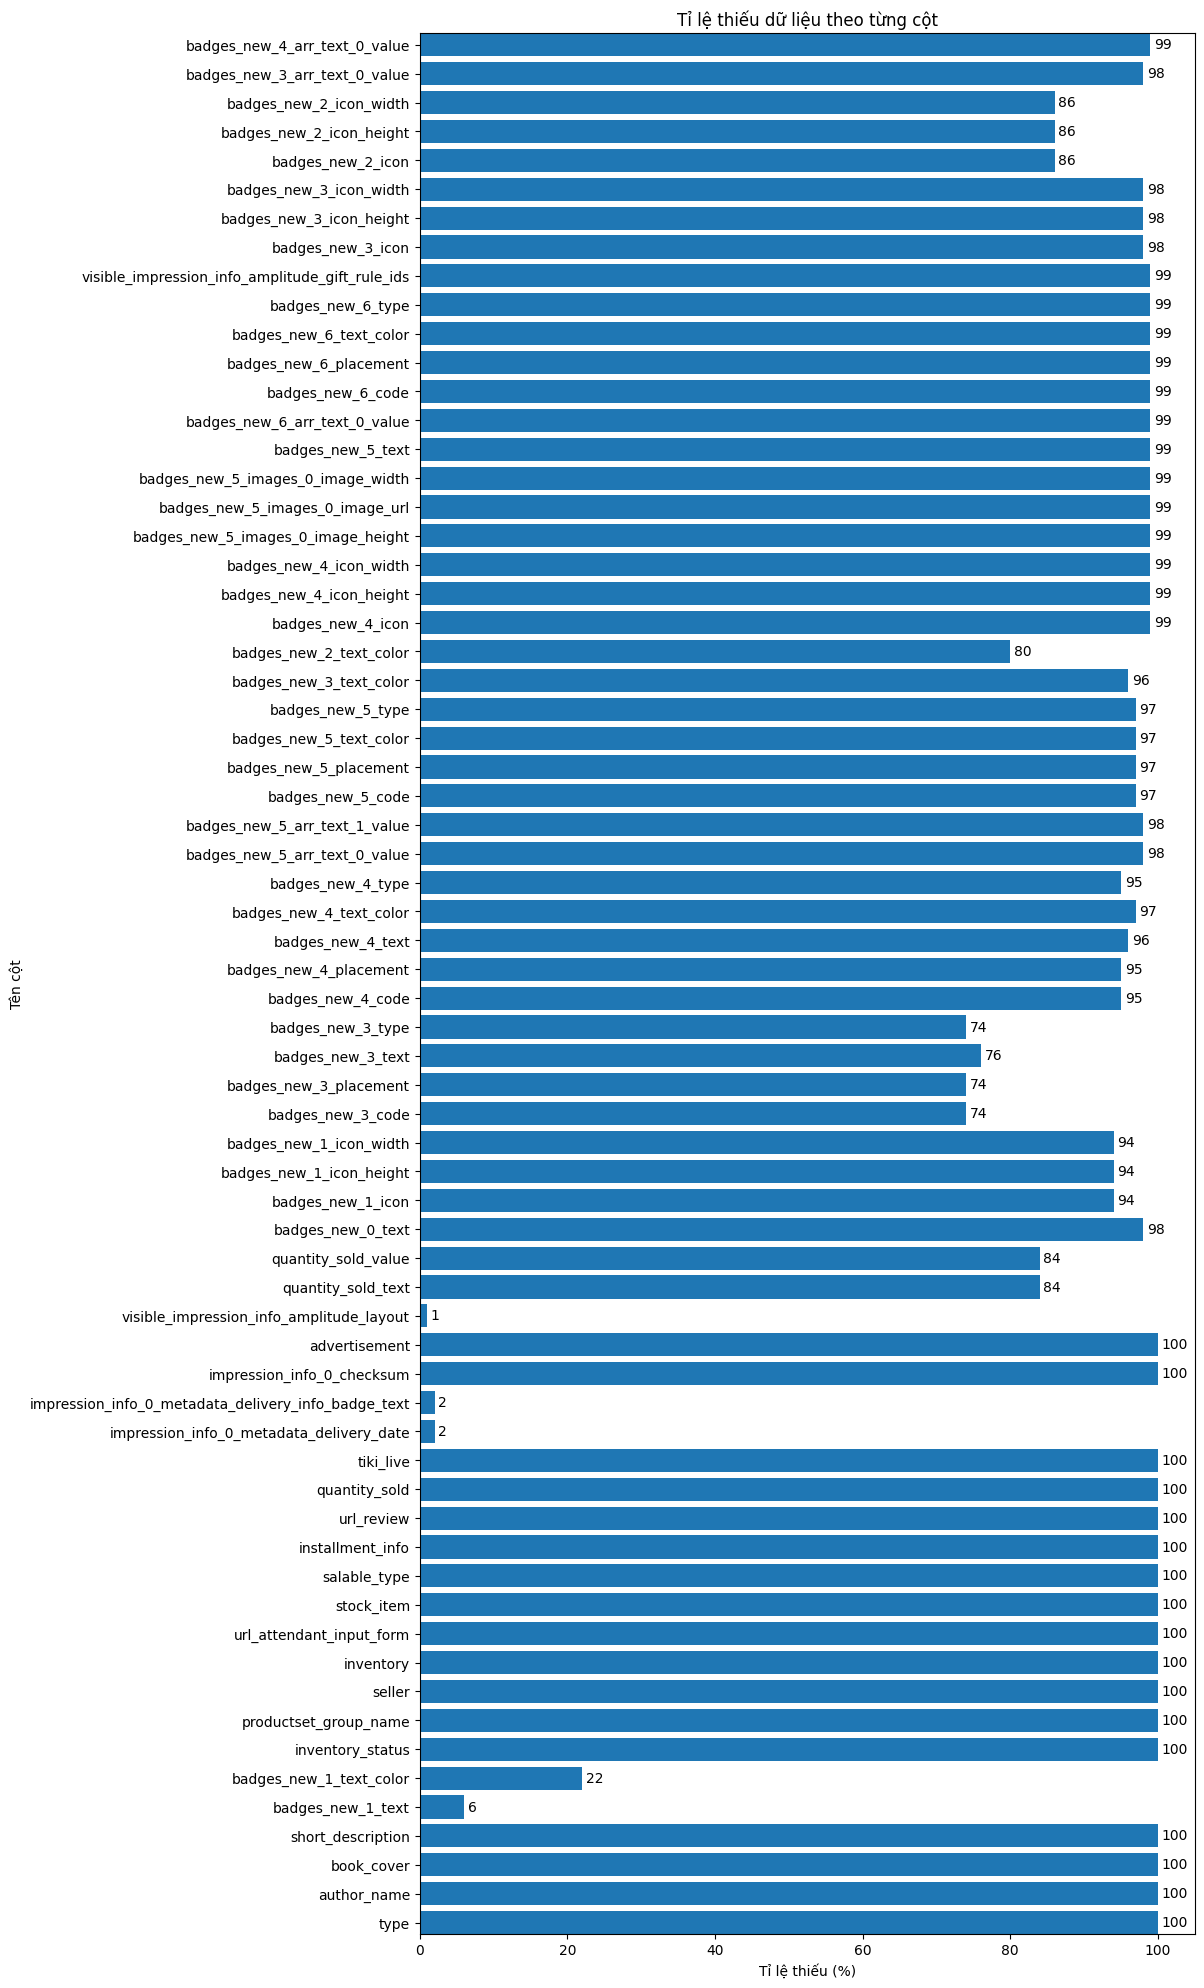

In [11]:
missing_ratio = (missing_summary / len(df)) * 100

plt.figure(figsize=(10, len(missing_ratio) * 0.3))
bars = plt.barh(missing_ratio.index, missing_ratio.values)

plt.xlabel("Tỉ lệ thiếu (%)")
plt.ylabel("Tên cột")
plt.title("Tỉ lệ thiếu dữ liệu theo từng cột")

for bar, val in zip(bars, missing_summary.values):
    plt.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height()/2,
        str(val),
        va='center'
    )
plt.margins(y=0)
plt.subplots_adjust(top=0.98, bottom=0.02)
plt.show()

# ***CLEANING***

***Bước làm sạch dữ liệu***

Xử lý giá trị thiếu (missing values)

Nếu cột thiếu toàn bộ hoặc >95% thì drop.
Nếu cột quan trọng nhưng thiếu ít → thay thế (mean/median cho số, mode cho categorical).

In [12]:
# Ngưỡng drop cột theo tỷ lệ thiếu
MISSING_COL_THRESHOLD = 0.95  # >95% thiếu thì drop

def strip_accents_lower(s):
    if pd.isna(s): return s
    s = str(s).strip().lower()
    nfkd = unicodedata.normalize("NFKD", s)
    return "".join([c for c in nfkd if not unicodedata.combining(c)])

def to_num(x):
    """Bóc tách số từ chuỗi (ưu tiên VNĐ là số nguyên), lỗi -> NaN."""
    if pd.isna(x): return np.nan
    s = str(x)
    try:
        return float(s)
    except:
        pass
    s = re.sub(r"[^\d.]", "", s)
    if s.count(".") > 1:  # nghi ngờ dấu . là ngăn cách nghìn
        s = s.replace(".", "")
    try:
        return float(s) if s else np.nan
    except:
        return np.nan

print("Kích thước ban đầu:", df.shape)

Kích thước ban đầu: (100, 176)


In [13]:
def parse_price(x):
    """Giữ lại chữ số và chuyển về float; trống -> NaN."""
    if pd.isna(x):
        return np.nan
    s = re.sub(r"[^\d]", "", str(x))
    return float(s) if s else np.nan

def strip_accents_lower(s):
    """Chuẩn hóa text: bỏ dấu, lowercase, strip khoảng trắng."""
    if pd.isna(s):
        return s
    s = str(s).strip().lower()
    nfkd = unicodedata.normalize("NFKD", s)
    return "".join([c for c in nfkd if not unicodedata.combining(c)])

In [14]:
df_clean = df.copy()

In [15]:
# Drop cột có tỷ lệ thiếu > ngưỡng

null_ratio = df_clean.isna().mean()
drop_cols = list(null_ratio[null_ratio > MISSING_COL_THRESHOLD].index)
df_clean = df_clean.drop(columns=drop_cols)
print(f"Đã drop {len(drop_cols)} cột thiếu > {int(MISSING_COL_THRESHOLD*100)}%")
print("Sau drop cột:", df_clean.shape)

Đã drop 45 cột thiếu > 95%
Sau drop cột: (100, 131)


In [16]:
for key_col in ["id","name"]:
    if key_col in df_clean.columns:
        before = len(df_clean)
        df_clean = df_clean[df_clean[key_col].notna()]
        print(f"Loại {before-len(df_clean)} hàng thiếu '{key_col}'")

Loại 0 hàng thiếu 'id'
Loại 0 hàng thiếu 'name'


In [17]:
if "id" in df_clean.columns:
    before = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=["id"])
    print("Drop duplicates theo 'id':", before - len(df_clean))
elif set(["name","brand_name"]).issubset(df_clean.columns):
    before = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=["name","brand_name"])
    print("Drop duplicates theo (name, brand_name):", before - len(df_clean))

print("Kích thước hiện tại:", df_clean.shape)

Drop duplicates theo 'id': 0
Kích thước hiện tại: (100, 131)


In [18]:
for col in ["price", "list_price"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(parse_price)
if set(["price","list_price"]).issubset(df_clean.columns):
    df_clean["discount_percent"] = np.where(
        df_clean["list_price"].gt(0) & df_clean["price"].notna(),
        (df_clean["list_price"] - df_clean["price"]) / df_clean["list_price"] * 100.0,
        np.nan
    )

In [19]:
def choose_best_column(frame, candidates):
    avail = [c for c in candidates if c in frame.columns]
    if not avail: return None
    nn = {c: frame[c].notna().sum() for c in avail}
    return max(nn, key=nn.get)

def coalesce(series_list):
    out = None
    for s in series_list:
        if s is None: 
            continue
        out = s if out is None else out.combine_first(s)
    return out

price_candidates      = ["price","final_price","sale_price","deal_price","current_price","best_price"]
list_price_candidates = ["list_price","original_price","price_before_discount","regular_price","old_price","reference_price"]
rate_candidates       = ["discount_rate","discount_percent","discountPercentage","discount_percent_api"]
abs_disc_candidates   = ["discount","discount_amount","price_discount","saved_amount"]

price_col      = choose_best_column(df_clean, price_candidates)
list_price_col = choose_best_column(df_clean, list_price_candidates)
rate_col       = choose_best_column(df_clean, rate_candidates)
abs_col        = choose_best_column(df_clean, abs_disc_candidates)

print("Cột phát hiện:")
print(" - price      :", price_col)
print(" - list_price :", list_price_col)
print(" - rate(%)    :", rate_col)
print(" - discount₫  :", abs_col)

# Ép kiểu số
if price_col:      df_clean["_price_fix"]      = pd.to_numeric(df_clean[price_col].map(to_num), errors="coerce")
if list_price_col: df_clean["_list_price_fix"] = pd.to_numeric(df_clean[list_price_col].map(to_num), errors="coerce")
if rate_col:       df_clean["_rate_fix"]       = pd.to_numeric(df_clean[rate_col].map(to_num), errors="coerce")
if abs_col:        df_clean["_disc_abs_fix"]   = pd.to_numeric(df_clean[abs_col].map(to_num), errors="coerce")

# Ưu tiên 1
dp1 = None
if price_col and list_price_col:
    lp = df_clean["_list_price_fix"]; pr = df_clean["_price_fix"]
    with np.errstate(divide='ignore', invalid='ignore'):
        dp1 = (lp - pr) / lp * 100.0
        dp1 = dp1.where((lp > 0) & pr.notna())

# Ưu tiên 2
dp2 = None
if rate_col:
    r = df_clean["_rate_fix"]
    dp2 = pd.to_numeric(np.where(r <= 1.0, r * 100.0, r), errors="coerce")

# Ưu tiên 3
dp3 = None
if abs_col and list_price_col:
    lp = df_clean["_list_price_fix"]; da = df_clean["_disc_abs_fix"]
    with np.errstate(divide='ignore', invalid='ignore'):
        dp3 = pd.to_numeric(da / lp * 100.0, errors="coerce").where(lp > 0)

# Gộp & làm sạch
dp = coalesce([dp1, pd.Series(dp2) if dp2 is not None else None, dp3])
if dp is not None:
    dp = pd.to_numeric(dp, errors="coerce").clip(-5, 100).round(2)
    df_clean["discount_percent"] = dp
else:
    df_clean["discount_percent"] = np.nan

print("Số dòng có discount_percent:", int(df_clean["discount_percent"].notna().sum()), "/", len(df_clean))


Cột phát hiện:
 - price      : price
 - list_price : list_price
 - rate(%)    : discount_rate
 - discount₫  : discount
Số dòng có discount_percent: 100 / 100


In [20]:
for col in ["name", "brand_name", "url_key", "url_path"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).map(strip_accents_lower)

In [21]:
if "brand_name" in df_clean.columns:
    df_clean["brand_clean"] = df_clean["brand_name"].str.replace(r"[^a-z0-9]+", " ", regex=True).str.strip()

df_clean[["price","list_price","discount_percent"]].head(3) if "price" in df_clean.columns else df_clean.head(3)

,price,list_price,discount_percent
0,14900000.0,0.0,0.0
1,12350000.0,0.0,0.0
2,18145000.0,0.0,0.0


Xử lý missing còn lại

Numeric: điền median

Categorical: điền mode

-> Chỉ áp dụng cho các cột KHÔNG phải khóa/id/text quan trọng

In [22]:
from pandas.api.types import is_numeric_dtype

In [23]:
# Cột không nên đụng tới khi fill (nếu tồn tại)
do_not_touch = set([c for c in ["id","sku","url_key","url_path"] if c in df_clean.columns])

num_cols = [c for c in df_clean.columns if is_numeric_dtype(df_clean[c]) and c not in do_not_touch]
cat_cols = [c for c in df_clean.columns if not is_numeric_dtype(df_clean[c]) and c not in do_not_touch]

In [24]:
# Fill numeric bằng median (nếu còn dữ liệu hợp lệ)
for c in num_cols:
    if df_clean[c].isna().any():
        if df_clean[c].notna().any():  # có ít nhất 1 giá trị không NaN
            med = df_clean[c].median(skipna=True)
            df_clean[c] = df_clean[c].fillna(med)
        else:
            print(f"Cột {c} toàn NaN, không thể tính median.")

# Fill categorical bằng mode (nếu có mode hợp lệ)
for c in cat_cols:
    if df_clean[c].isna().any():
        mode_vals = df_clean[c].mode(dropna=True)
        if not mode_vals.empty:
            df_clean[c] = df_clean[c].fillna(mode_vals.iloc[0])
        else:
            print(f"Cột {c} toàn NaN, không thể tính mode.")

print("Đã fill missing cho numeric & categorical (ổn định hơn).")

Đã fill missing cho numeric & categorical (ổn định hơn).


In [25]:
print("Kích thước cuối:", df_clean.shape)

# Thống kê cột còn thiếu sau fill
missing_left = df_clean.isna().sum()
missing_left = missing_left[missing_left > 0].sort_values(ascending=False)
print("Cột còn thiếu (top 15):")
print(missing_left.head(15))

# Sắp xếp cột: ưu tiên cột hay dùng lên đầu (nếu có)
preferred = [c for c in ["id","sku","name","brand_name","brand_clean","price","final_price","list_price","original_price","discount_percent","url_key","url_path"] if c in df_clean.columns]
rest = [c for c in df_clean.columns if c not in preferred]
df_clean = df_clean[preferred + rest]

Kích thước cuối: (100, 137)
Cột còn thiếu (top 15):
Series([], dtype: int64)


In [26]:
df = df_clean.copy()

In [27]:
df.head(10)

,id,sku,name,brand_name,brand_clean,price,list_price,original_price,discount_percent,url_key,...,badges_new_4_placement,badges_new_4_type,badges_new_2_text_color,badges_new_2_icon,badges_new_2_icon_height,badges_new_2_icon_width,_price_fix,_list_price_fix,_rate_fix,_disc_abs_fix
0,278226869,2945221924243,laptop dell inspiron 3530 71043887( core i5-13...,dell,dell,14900000.0,0.0,14950000,0.0,laptop-dell-inspiron-3530-71043887-core-i5-133...,...,above_product_name,delivery_info_badge,#808089,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,14900000.0,0.0,0.0,50000.0
1,278226504,8916945952669,laptop dell inspiron 15 3530 n3530-i3u085w11sl...,dell,dell,12350000.0,0.0,12400000,0.0,laptop-dell-inspiron-15-3530-n3530-i3u085w11sl...,...,above_product_name,delivery_info_badge,#808089,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,12350000.0,0.0,0.0,50000.0
2,278078317,3260486333768,asus vivobook s 14 flip tp3402va-lz632w (intel...,asus,asus,18145000.0,0.0,18195000,0.0,asus-vivobook-s-14-flip-tp3402va-lz632w-intel-...,...,above_product_name,delivery_info_badge,#808089,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,18145000.0,0.0,0.0,50000.0
3,278078298,4377873239825,asus vivobook 15 x1502va-bq886w (intel core i7...,asus,asus,15650000.0,0.0,15700000,0.0,asus-vivobook-15-x1502va-bq886w-intel-core-i7-...,...,above_product_name,delivery_info_badge,#808089,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,15650000.0,0.0,0.0,50000.0
4,278078286,8288406691059,asus vivobook 14 x1405va-ly623w (intel core i5...,asus,asus,14580000.0,0.0,14630000,0.0,asus-vivobook-14-x1405va-ly623w-intel-core-i5-...,...,above_product_name,delivery_info_badge,#808089,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,14580000.0,0.0,0.0,50000.0
5,278078281,5166127674767,asus vivobook x1404va-nk394w (intel core i3-13...,asus,asus,9685000.0,0.0,9735000,100.0,asus-vivobook-x1404va-nk394w-intel-core-i3-131...,...,above_product_name,delivery_info_badge,#808089,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,9685000.0,0.0,1.0,50000.0
6,278078278,9946033681073,asus zenbook 14 ux3405ca-pz204ws (intel core u...,asus,asus,35377000.0,0.0,35427000,0.0,asus-zenbook-14-ux3405ca-pz204ws-intel-core-ul...,...,above_product_name,delivery_info_badge,#808089,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,35377000.0,0.0,0.0,50000.0
7,278076611,2162922536735,asus rog strix g16 g614ju-n3480w (intel core i...,asus,asus,29110000.0,0.0,29160000,0.0,asus-rog-strix-g16-g614ju-n3480w-intel-core-i5...,...,above_product_name,delivery_info_badge,#808089,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,29110000.0,0.0,0.0,50000.0
8,278076601,9936685515442,laptop asus tuf gaming a15 fa506ncr-hn097w (r7...,asus,asus,19535000.0,0.0,19585000,0.0,laptop-asus-tuf-gaming-a15-fa506ncr-hn097w-r7-...,...,above_product_name,delivery_info_badge,#808089,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,19535000.0,0.0,0.0,50000.0
9,278071899,1759391453815,laptop lenovo thinkpad e14 gen 7 21sx002qva (i...,lenovo,lenovo,21350000.0,0.0,21400000,0.0,laptop-lenovo-thinkpad-e14-gen-7-21sx002qva-in...,...,above_product_name,delivery_info_badge,#808089,https://salt.tikicdn.com/cache/w96/ts/tka/26/a...,16.0,32.0,21350000.0,0.0,0.0,50000.0


Lọc các cột chỉ để lại các cột phục vụ cho đề tài

In [28]:
# chọn cột quan trọng
keep_cols = [
    c
    for c in [
        "id",
        "name",
        "brand_clean",
        "brand_name",
        "price",
        "list_price",
        "discount_percent",
        "image_path",
        "thumbnail_url",
        "rating_average",
        "seller_product_id",
        "quantity_sold_value"
    ]
    if c in df_clean.columns
]
df_core = df_clean[keep_cols].copy()

# --- tạo cột brand: ưu tiên brand_clean nếu có ---
if "brand_clean" in df_core.columns:
    df_core["brand"] = df_core["brand_clean"]
elif "brand_name" in df_core.columns:
    df_core["brand"] = df_core["brand_name"]

# --- bỏ hẳn brand_name & brand_clean để không trùng lặp ---
df_core = df_core.drop(
    columns=[c for c in ["brand_clean", "brand_name"] if c in df_core.columns]
)

# --- chuẩn hóa số cho price ---
if "price" in df_core.columns:
    df_core["price"] = pd.to_numeric(df_core["price"].map(to_num), errors="coerce")

# --- loại bỏ list_price và discount_percent nếu toàn NaN/0 ---
for col in ["list_price", "discount_percent"]:
    if col in df_core.columns:
        if df_core[col].isna().all() or (df_core[col].fillna(0) == 0).all():
            df_core = df_core.drop(columns=[col])
            print(f"Đã drop {col} vì toàn NaN/0")

# --- loại bản ghi không có image_path ---
if "image_path" in df_core.columns:
    before = len(df_core)
    df_core = df_core[df_core["image_path"].astype(str).str.strip().ne("")]
    print("Loại hàng thiếu image_path:", before - len(df_core))

# --- bỏ bản ghi trùng đường dẫn ảnh (nếu ảnh trùng file) ---
if "image_path" in df_core.columns:
    before = len(df_core)
    df_core = df_core.drop_duplicates(subset=["image_path"])
    print("Drop duplicates theo image_path:", before - len(df_core))
    
# --- drop trùng theo id nếu có ---
if "id" in df_core.columns:
    before = len(df_core)
    df_core = df_core.drop_duplicates(subset=["id"])
    print("Drop duplicates theo id:", before - len(df_core))

# --- sắp xếp cột chính ---
preferred = [
    c for c in ["id", "name", "brand", "image_path", "thumbnail_url"] if c in df_core.columns
]
rest = [c for c in df_core.columns if c not in preferred]
df_core = df_core[preferred + rest]

print("Kích thước sau rút gọn:", df_core.shape)
print(df_core.head(10))

Đã drop list_price vì toàn NaN/0
Loại hàng thiếu image_path: 0
Drop duplicates theo image_path: 0
Drop duplicates theo id: 0
Kích thước sau rút gọn: (100, 10)
          id                                               name   brand  \
0  278226869  laptop dell inspiron 3530 71043887( core i5-13...    dell   
1  278226504  laptop dell inspiron 15 3530 n3530-i3u085w11sl...    dell   
2  278078317  asus vivobook s 14 flip tp3402va-lz632w (intel...    asus   
3  278078298  asus vivobook 15 x1502va-bq886w (intel core i7...    asus   
4  278078286  asus vivobook 14 x1405va-ly623w (intel core i5...    asus   
5  278078281  asus vivobook x1404va-nk394w (intel core i3-13...    asus   
6  278078278  asus zenbook 14 ux3405ca-pz204ws (intel core u...    asus   
7  278076611  asus rog strix g16 g614ju-n3480w (intel core i...    asus   
8  278076601  laptop asus tuf gaming a15 fa506ncr-hn097w (r7...    asus   
9  278071899  laptop lenovo thinkpad e14 gen 7 21sx002qva (i...  lenovo   

               

In [29]:
df = df_core.copy()

In [30]:
df.to_excel("../data_cleaned/laptop.xlsx", index=False)